# Midterm Assignment

In [1]:
# 1. (a)
#             matrix 1                      matrix 2
# matrices: [ [[x,x,x], [x,x,x], [x,x,x]], [[x,x,x], [x,x,x], [x,x,x]] ]
# I assume to have y amount of matrices and that they are multiplied form left to right (so they are not seperated by braces)
def matrix_multiplication(matrices):

    multiplicand = matrices[0]
    multiplier = matrices[1]

    for matrix_index in range(0, len(matrices) - 1):

        multiplicand = multiply_two_matrices(multiplicand, multiplier)
        try:
            multiplier = matrices[matrix_index + 1]
        except IndexError:
            break

    return multiplicand

def multiply_two_matrices(matrix1, matrix2):
    rows = matrix1
    columns = [list(x) for x in zip(*matrix2)]

    new_matrix = []
    for row in rows:
        new_row = []
        for column in columns:
            new_row.append(sum([a*b for a,b in zip(row, column)]))
        new_matrix.append(new_row)
    return new_matrix

Size: 10x10, Time: 6.29425048828125e-05 seconds
Size: 50x50, Time: 0.004029035568237305 seconds
Size: 100x100, Time: 0.031649112701416016 seconds
Size: 200x200, Time: 0.22986221313476562 seconds
Size: 500x500, Time: 3.29424786567688 seconds
Size: 800x800, Time: 12.914477109909058 seconds
Size: 1000x1000, Time: 24.91804599761963 seconds


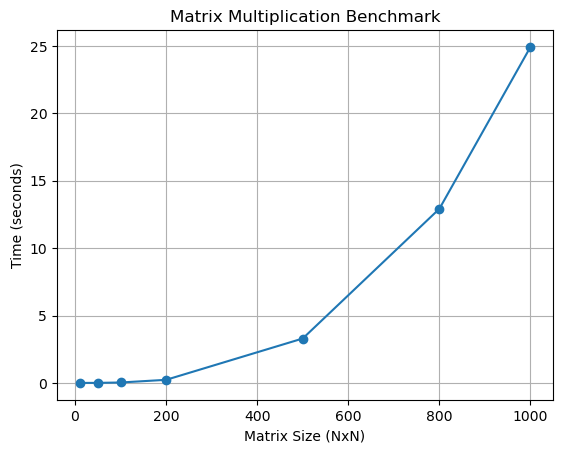

In [2]:
# 1. (b)

import numpy as np
import matplotlib.pyplot as plt
import time

matrix_sizes = [10, 50, 100, 200, 500, 800, 1000]
times = []

for size in matrix_sizes:
    matrix1 = np.random.randint(0, 10, (size, size)).tolist()
    matrix2 = np.random.randint(0, 10, (size, size)).tolist()
    matrices = [matrix1, matrix2]

    start_time = time.time()
    matrix_multiplication(matrices)
    end_time = time.time()

    times.append(end_time - start_time)
    print(f"Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot(matrix_sizes, times, marker='o')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.grid(True)
plt.show()

Size: 10x10, Time: 3.981590270996094e-05 seconds
Size: 50x50, Time: 0.0003228187561035156 seconds
Size: 100x100, Time: 0.00131988525390625 seconds
Size: 200x200, Time: 0.007216215133666992 seconds
Size: 500x500, Time: 0.06172013282775879 seconds
Size: 800x800, Time: 0.4089009761810303 seconds
Size: 1000x1000, Time: 0.6681830883026123 seconds


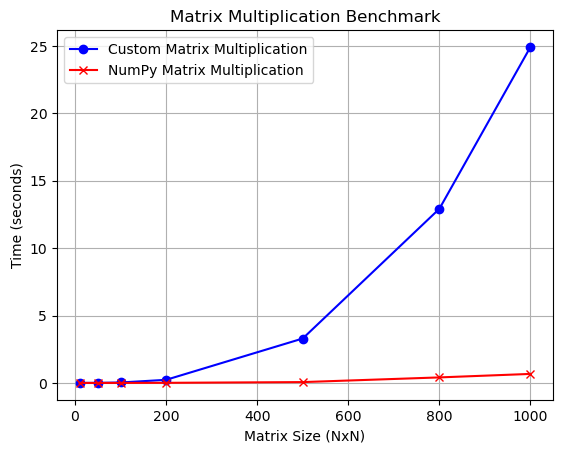

In [3]:
# 1. (c)

np_times = []

for size in matrix_sizes:
    matrix1 = np.random.randint(0, 10, (size, size)).tolist()
    matrix2 = np.random.randint(0, 10, (size, size)).tolist()
    matrices = [matrix1, matrix2]

    start_time = time.time()
    np.matmul(matrix1, matrix2)
    end_time = time.time()

    np_times.append(end_time - start_time)
    print(f"Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot(matrix_sizes, times, marker='o', label='Custom Matrix Multiplication', color='blue')
plt.plot(matrix_sizes, np_times, label='NumPy Matrix Multiplication', marker='x', color='red')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.legend()
plt.grid(True)
plt.show()

#### 1. (d)
The time complexity of both methods differ as their implementations also differ

My implementation has a time complexity of O(n^3) as it contains 3 nested loops which iterate over the rows and columns of the matrices

NumPy's implementation is optimized and has a time complexity of O(n^2.807) as it uses the Strassen algorithm for matrix multiplication


Size: 10x10, Time: 3.528594970703125e-05 seconds
Size: 50x50, Time: 0.0002899169921875 seconds
Size: 100x100, Time: 0.0009489059448242188 seconds
Size: 200x200, Time: 0.0056362152099609375 seconds
Size: 500x500, Time: 0.059648990631103516 seconds
Size: 800x800, Time: 0.40590810775756836 seconds
Size: 1000x1000, Time: 0.6862800121307373 seconds


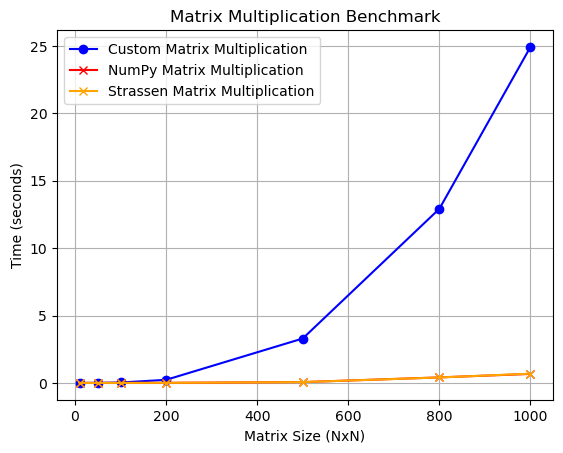

In [4]:
# 1. (e)

def strassen(matrix1, matrix2):
    if len(matrix1) <= 2:
        return multiply_two_matrices(matrix1, matrix2)

    a, b, c, d = split(matrix1)
    e, f, g, h = split(matrix2)

    p1 = strassen(a + d, e + h)
    p2 = strassen(d, g - e)
    p3 = strassen(a + b, h)
    p4 = strassen(b - d, g + h)
    p5 = strassen(a, f - h)
    p6 = strassen(c + d, e)
    p7 = strassen(a - c, e + f)

    matrix3_11 = (p1 + p2) - (p3 + p4)
    matrix3_12 = p3 + p5
    matrix3_21 = p2 + p6
    matrix3_22 = p5 + p1 - p6 - p7

    matrix3 = np.vstack((np.hstack((matrix3_11, matrix3_12)), np.hstack((matrix3_21, matrix3_22))))
    return matrix3


def split(matrix):
    n = len(matrix)
    return matrix[:n//2, :n//2], matrix[:n//2, n//2:], matrix[n//2:, :n//2], matrix[n//2:, n//2:]

strassen_times = []

for size in matrix_sizes:
    matrix1 = np.random.randint(0, 10, (size, size)).tolist()
    matrix2 = np.random.randint(0, 10, (size, size)).tolist()
    matrices = [matrix1, matrix2]

    start_time = time.time()
    np.matmul(matrix1, matrix2)
    end_time = time.time()

    strassen_times.append(end_time - start_time)
    print(f"Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot(matrix_sizes, times, marker='o', label='Custom Matrix Multiplication', color='blue')
plt.plot(matrix_sizes, np_times, label='NumPy Matrix Multiplication', marker='x', color='red')
plt.plot(matrix_sizes, strassen_times, label='Strassen Matrix Multiplication', marker='x', color='orange')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.legend()
plt.grid(True)
plt.show()